### Missing Data

#### 1. 	No missing data is allowed in time series as data is ordered.
#### 2. 	It is simply not possible to shift the series to fill in the gaps.


### Reasons for missing data

#### 1) 	Data is not collected or recorded
#### 2) 	Data never existed
#### 3) 	Data corruption

#### Mark missing values

* NaN is the default missing value marker for reasons of computational speed and convenience. 
* We can easily detect this value with data of different types: floating point, integer, Boolean and general object. 
* However, the Python None will arise and we wish to also consider that missing.
* To make detecting missing values easier across different array dtypes, pandas provides functions, isna() and notna(), which are also methods on Series and DataFrame objects.
* For datetime64[ns] types, NaT represents missing values. Pandas objects provide histocompatibility between NaT and NaN.

### Inserting missing values

You can assign missing values by simply assigning to containers. The missing value will be chosen based on the dtype.

In [1]:
import pandas as pd
import numpy  as np
s = pd.Series([1,2,3,4,5,6])
s.loc[4] = np.NaN
print(s)

0    1.0
1    2.0
2    3.0
3    4.0
4    NaN
5    6.0
dtype: float64


### Calculations with missing values

**Descriptive statistics and computational statistical methods are written to take into account for missing data.  **

**Examples:**

* When summing data, NA(missing) values will be treated as zeros.
* If the data are all NA, the result will be 0.
* Cumulative methods like cumsum() and cumprod() ignore NA values by default but preserve them in the resulting arrays. To override this behaviour and include NA values, use skipna = False

A time series is a series of data points indexed in time order.  Most of the times, users want to replace the missing values in time series data by neighbouring non-missing values.  There may be a need for imputation or interpolation of missing values lying in between known values. 

Methods of imputation for replacing missing values (meaningful values)

| Method | When suitable |
| ---------------------------- | ------------------------------------ |
| Take average of the nearest neighbours | Data has no seasonality |
| Take average of the seasons from two or all available years | Data has seasonality |
| Interpolate function of pandas |  |
| Linear interpolation | Relationship in the interval of two samples is a first order polynomial |
| Polynomial such as Quadratic or Cubic interpolation | Second or third order polynomial describes the interval between two samples |
| Spline | Handles non-uniform spacing of samples |

### Example 11

The file "Shoe Sales.csv", contains the shoe sales data about  number of pairs sold during the period 2011 - 2015. In May 2012, the number of pairs sold was 932. Let us replace this with missing value and try to interpolate.

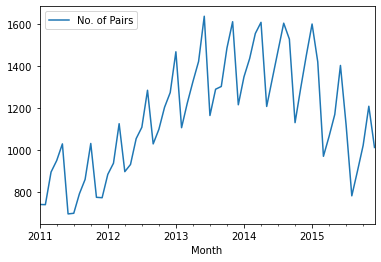

In [2]:
from     pandas                   import read_csv
# from     pandas                   import datetime #this particular submodule from pandas will be deprecated in future
# versions, thus the next line of code
from     datetime                 import datetime
import matplotlib.pyplot as         plt
import numpy                    as         np

def parser(x): return datetime.strptime(x, '%Y-%b')

series              =  read_csv('D:/Shoe Sales.csv', header = 0, index_col = 0, parse_dates = True,
                                              squeeze = True, date_parser = parser)
df                    = pd.DataFrame(series)

df.plot()
plt.show()

Let us replace the number of pairs for 2012-May which is 932 as np.NaN.
Interpolate using linear of polynomial or spline methods.

Since the data has monthly frequency, we can resample at a shorter frequency such as day, Daily to get a better predicton.
Some of the alias for time series frequency to be used in resample():
1. B: Business Day frequency
2. D: Calendar Day frequency
3. M: Month End frequency
4. MS: Month Start frequency
5. Q: Quarter End Frequency
6. QS: Quarter Start Frequency
7. H: Hourly Frequency
8. A: Year End frequency

http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases


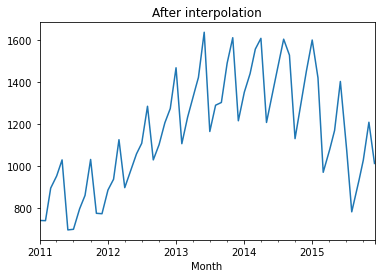

In [3]:
df.replace(932, np.NaN, inplace = True)
series.converted  = df['No. of Pairs']
ts                             = series.converted.resample('D').mean() #the syntax has changed due to the updated version
#of the packages

series_imputed1   = ts.interpolate(method = 'linear')
series_imputed1.plot()
plt.title('After interpolation')
plt.show()


In [4]:
print('Imputed value')
print(series_imputed1['2012-05'].head(12))

print('Original value')
print(series['2012-05'].head(12))


Imputed value
Month
2012-05-01     975.213115
2012-05-02     977.786885
2012-05-03     980.360656
2012-05-04     982.934426
2012-05-05     985.508197
2012-05-06     988.081967
2012-05-07     990.655738
2012-05-08     993.229508
2012-05-09     995.803279
2012-05-10     998.377049
2012-05-11    1000.950820
2012-05-12    1003.524590
Freq: D, Name: No. of Pairs, dtype: float64
Original value
Month
2012-05-01    932
Name: No. of Pairs, dtype: int64


Here, we see that the new value and the previous value for which we had manually put NaN is the same.

# END